In [ ]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np


In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
print('training images: {}'.format(x_train.shape))
print('testing images: {}'.format(x_test.shape))

training images: (50000, 32, 32, 3)
testing images: (10000, 32, 32, 3)


In [ ]:
print(x_train[0].shape)

(32, 32, 3)


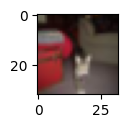

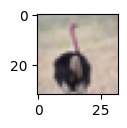

In [ ]:
for i in range(334,336):
  plt.subplot(120+ 1 +i)
  img = x_train[i]
  plt.imshow(img)
  plt.show()

In [ ]:
x_train = x_train.reshape(x_train.shape[0],32,32,3)
x_test = x_test.reshape(x_test.shape[0],32,32,3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /=225
n_classes=10


print("shape before one hot encoding: ",y_train.shape)
y_train=np_utils.to_categorical(y_train,n_classes)
y_test=np_utils.to_categorical(y_test,n_classes)
print("shape after one hot encoding:",y_train.shape)

shape before one hot encoding:  (50000, 1)
shape after one hot encoding: (50000, 10)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.optimizers import Adam

# Create a Sequential model
model = Sequential()
model.add(Conv2D(50, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu',input_shape=(32,32,3)))
# Add convolutional layers with max pooling and dropout
model.add(Conv2D(75, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Add dense layers with dropout
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

# Output layer with appropriate activation (softmax for multi-class)
model.add(Dense(10, activation='softmax'))  # Replace Num_Classes with the number of classes

# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='Adam')


# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
391/391 [==============================] - 754s 2s/step - loss: 1.6013 - accuracy: 0.4109 - val_loss: 1.1848 - val_accuracy: 0.5747
Epoch 2/10
391/391 [==============================] - 740s 2s/step - loss: 1.1344 - accuracy: 0.5982 - val_loss: 0.9586 - val_accuracy: 0.6640
Epoch 3/10
391/391 [==============================] - 755s 2s/step - loss: 0.9471 - accuracy: 0.6690 - val_loss: 0.8218 - val_accuracy: 0.7158
Epoch 4/10
391/391 [==============================] - 756s 2s/step - loss: 0.8331 - accuracy: 0.7108 - val_loss: 0.7766 - val_accuracy: 0.7321
Epoch 5/10
391/391 [==============================] - 758s 2s/step - loss: 0.7557 - accuracy: 0.7369 - val_loss: 0.7261 - val_accuracy: 0.7501
Epoch 6/10
391/391 [==============================] - 750s 2s/step - loss: 0.6877 - accuracy: 0.7589 - val_loss: 0.6902 - val_accuracy: 0.7592
Epoch 7/10
391/391 [==============================] - 747s 2s/step - loss: 0.6313 - accuracy: 0.7785 - val_loss: 0.6667 - val_accuracy: 0.7631

In [ ]:
classes = range(0,10)

names = ['airplane',
         'automobile',
         'bird',
         'cat',
         'deer',
         'frog',
         'horse',
         'ship',
         'truck']


class_labels = dict(zip(classes,names))

batch = x_test[100:109]
labels=np.argmax(y_test[100:109],axis=-1)

predictions = model.predict(batch,verbose=1)


1/1 [==============================] - 0s 165ms/step


In [ ]:
print (predictions)

[[9.9405643e-06 2.5368136e-06 1.3924463e-02 1.8461118e-02 6.2826967e-01
  6.1830249e-02 9.5377199e-04 2.7652553e-01 6.0189905e-06 1.6593343e-05]
 [2.1099437e-05 9.2229029e-06 9.2296954e-03 1.9143739e-01 2.9074479e-02
  7.1533173e-01 3.3037297e-02 2.1633035e-02 9.3396098e-05 1.3264453e-04]
 [3.9774145e-06 1.8410294e-05 1.8148273e-03 2.6200736e-02 5.5662531e-04
  1.2347965e-02 9.5887518e-01 1.6812676e-04 3.0794813e-06 1.0929711e-05]
 [9.7332777e-05 4.9908431e-05 2.7263493e-03 8.6054784e-01 2.2532938e-03
  7.1896285e-02 5.9922669e-02 1.5736806e-03 9.1822831e-06 9.2343509e-04]
 [2.3427582e-08 9.9994224e-01 3.5341107e-12 4.0941447e-13 2.6362977e-14
  1.8630009e-14 3.7390993e-12 2.0902339e-14 1.8051593e-06 5.5849123e-05]
 [3.1592513e-08 9.9988741e-01 3.3077263e-10 1.7871810e-10 4.0104047e-13
  2.6290671e-11 7.7523432e-10 5.5253241e-13 9.2060538e-05 2.0430280e-05]
 [1.9145977e-03 4.2390201e-04 3.3116866e-02 7.8410292e-01 9.6346368e-04
  1.4755310e-01 2.8599339e-02 2.3123403e-03 7.0483331e-04 

In [ ]:
for image in predictions:
  print(np.sum(image))

0.9999998
1.0
0.9999999
1.0
0.9999999
1.0
1.0
1.0
1.0


In [ ]:
class_result = np.argmax(predictions,axis=-1)
print(class_result)

[4 5 6 3 1 1 3 6 8]


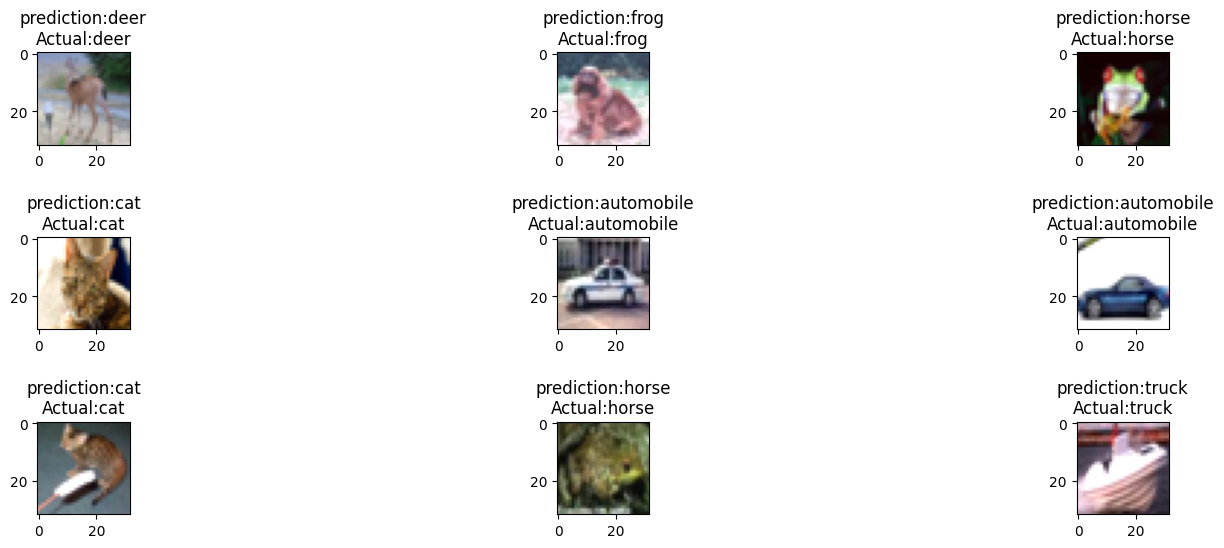

In [ ]:
fig, axs =plt.subplots(3,3,figsize = (19,6))
fig.subplots_adjust(hspace = 1)
axs=axs.flatten()

for i, img in enumerate(batch):
    for key,value in class_labels.items():
        if class_result[i] ==key:
            title = 'prediction:{}\nActual:{}'.format(class_labels[key],class_labels[labels[i]])
            axs[i].set_title(title)
            #axs[i].axis.get_xaxis().set_visible(False)
            #axs[i].axis.get_yaxis().set_visible(False)
    axs[i].imshow(img)

plt.show()
